<a href="https://colab.research.google.com/github/LuisJavierFI/Human-Resources/blob/main/Recursos_Humanos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contratar y retener a los mejores empleados de una empresa
https://toggl.com/blog/cost-of-hiring-an-employee

# Objetivos
* Desarrollar  modelos que predigan que empleados tienen más probabilidades de dejar el trabajo
  * Regresión Lógistica
  * Clasificadores de bosques aleatorios
  * Red Neuronal
* Reducir la rotación de empleados

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

# Set de datos
* https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset


In [32]:
employee_df = pd.read_csv("https://raw.githubusercontent.com/LuisJavierFI/Human-Resources/main/Human_Resources.csv")

In [33]:
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [34]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [35]:
employee_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [36]:
employee_df[['Attrition','OverTime','Over18']]

,Attrition,OverTime,Over18
0,Yes,Yes,Y
1,No,No,Y
2,Yes,Yes,Y
3,No,Yes,Y
4,No,No,Y
...,...,...,...
1465,No,No,Y
1466,No,No,Y
1467,No,Yes,Y
1468,No,No,Y


# Visualización del Dataset

In [37]:
# employee_df['Attrition'] = employee_df['Attrition'].apply(lambda x: 1 if x=='Yes' else 0)

In [38]:
# Reemplazamos las columnas 'Attritition' y 'overtime' por enteros antes de poder llevar a cabo cualquier visualización
#acceder al campo a modificar = transformar los datos
employee_df['Attrition'] = employee_df['Attrition'].apply(lambda x: 1 if x=='Yes' else 0)
employee_df['OverTime'] = employee_df['OverTime'].apply(lambda x: 1 if x=='Yes' else 0)
employee_df['Over18'] = employee_df['Over18'].apply(lambda x: 1 if x=='Y' else 0)

In [39]:
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


<Axes: >

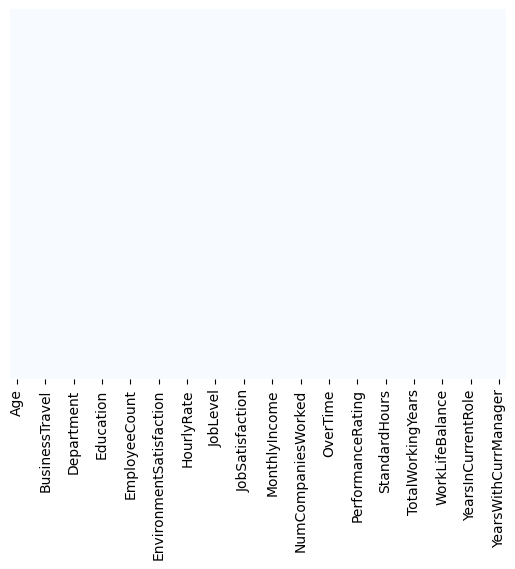

In [40]:
# Ver datos Faltantes
sns.heatmap(employee_df.isnull(),yticklabels=False,cbar=False, cmap='Blues')

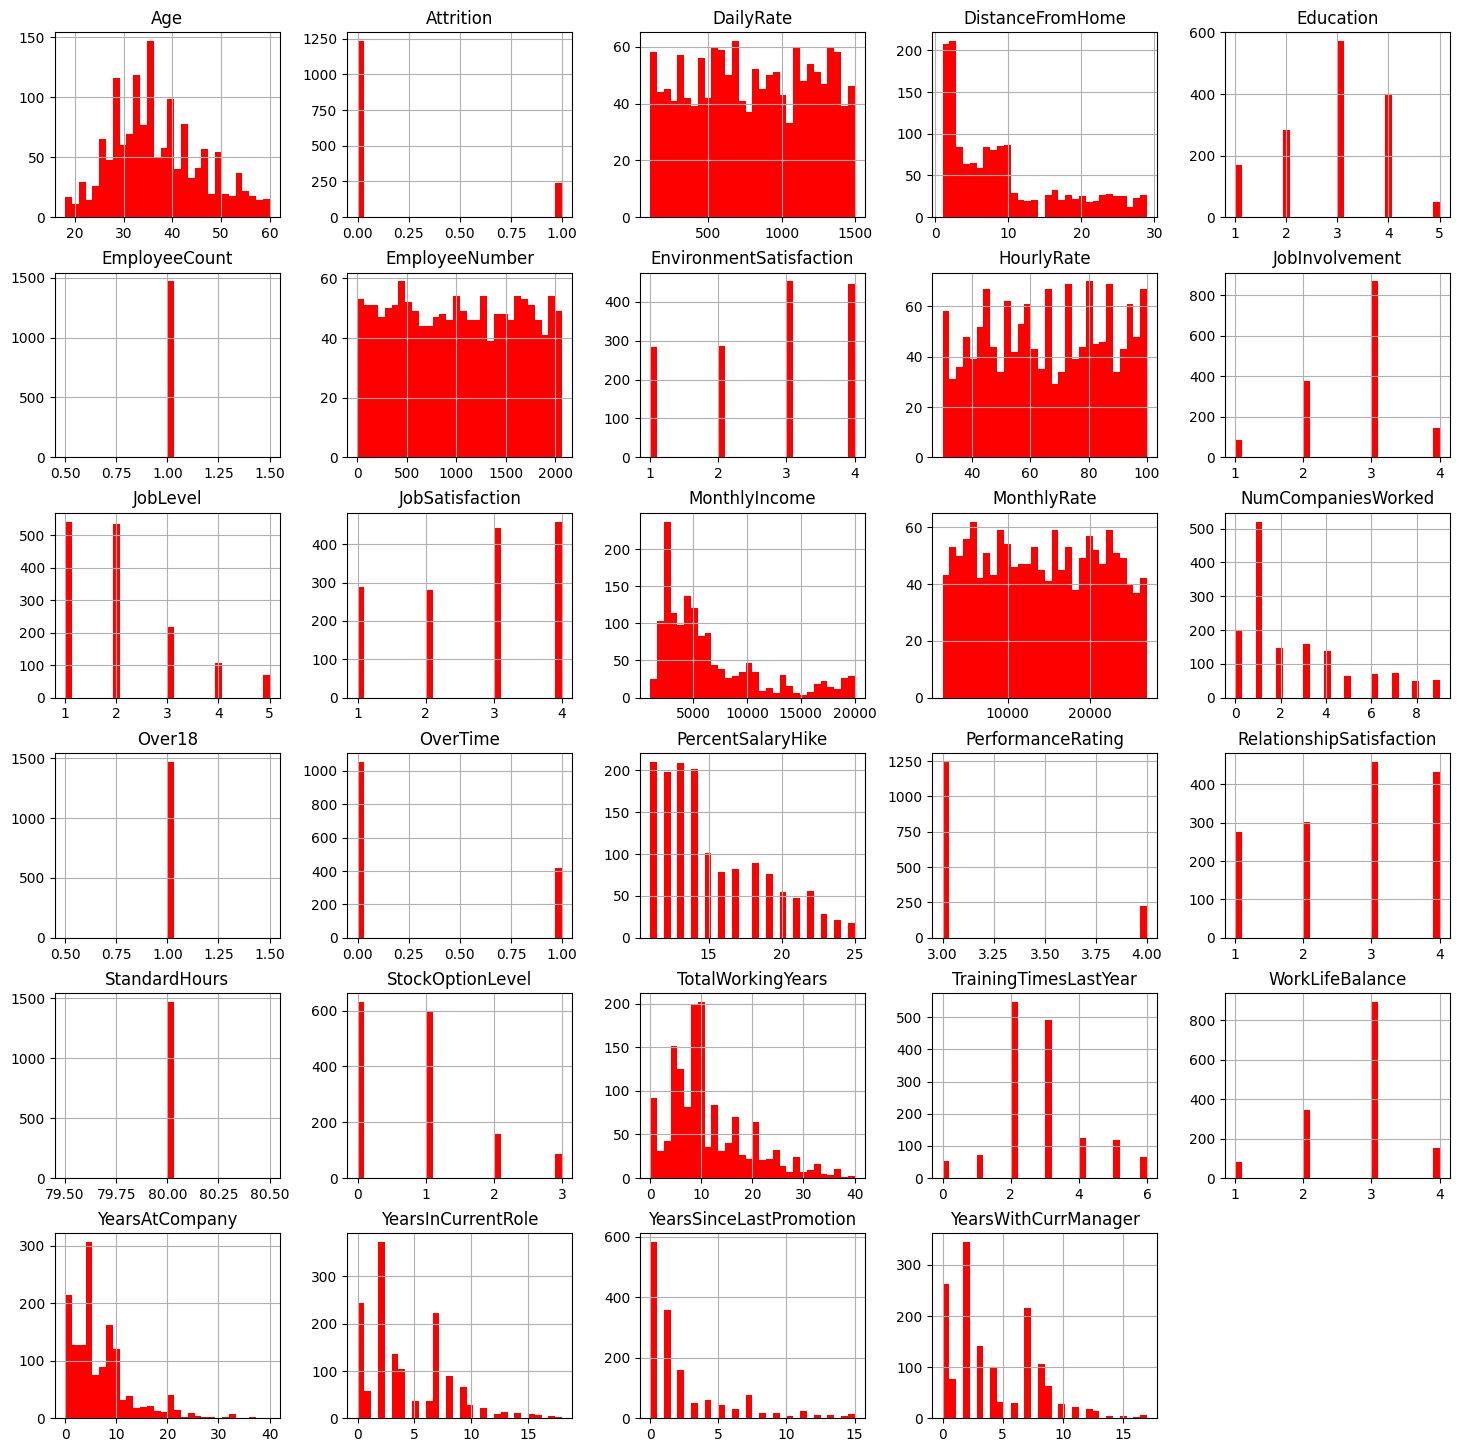

In [41]:
# Distribución de las variables
employee_df.hist(bins=30, figsize=(18,18), color='r')
plt.show()
# Algunas características como 'MonthlyIncome' y 'TotalWorkingYears' tienen una distribución con una cola muy larga (long tail distribution)
# Quitar 'EmployeeCount' y 'Standardhours' ya que estos campos no cambian de un empleado a otro

In [42]:
# Deshacerse de 'EmployeeCount' , 'Standardhours' y 'Over18' ya que son campos que no cambian de un empleado a otro
# Eliminar 'EmployeeNumber' también es "plano" y se puede ver que es el "id" ya que no aporta nada
employee_df.drop(['EmployeeCount','StandardHours','Over18','EmployeeNumber'],axis=1, inplace=True)
employee_df.shape

(1470, 31)

In [43]:
# Veamos cuantos empleados dejan la empresa!
#empleados que se marchan
left_df = employee_df[employee_df['Attrition']== 1]
#empleados que se quedan
stayed_df = employee_df[employee_df['Attrition']== 0]

In [44]:
# Contamos el número de empleados que se quedaron y que se fueron
# Conjunto de datos desequilibrado
print("Total = ",len(employee_df))

print("Empleados que dejan la empresa = ",len(left_df))
print("Porcentaje de empleados que dejan la empresa =", 1.*len(left_df)/len(employee_df)*100.0, "%")

print("Empleados que se quedan en la empresa = ",len(stayed_df))
print("Porcentaje de empleados que se quedan en la empresa =", 1.*len(stayed_df)/len(employee_df)*100.0, "%")

Total =  1470
Empleados que dejan la empresa =  237
Porcentaje de empleados que dejan la empresa = 16.122448979591837 %
Empleados que se quedan en la empresa =  1233
Porcentaje de empleados que se quedan en la empresa = 83.87755102040816 %


In [45]:
left_df.describe()
# Comparar la media y el error estándar de los empleados que se quedaron y se fueron
# 'age': la edad media de los empleados que se quedaron es mayor en comparación con los que se fueron
# 'DailyRate': El rate diario de los empleados que se quedaron es mayor
# 'DistanceFromHome': Los empleados que se quedan viven más cerca del trabajo
# 'EnvironmentSatisfaction' & 'JobSatisfaction': Los empleados que se quedan están en general más satisfechos con sus trabajos
# 'StockOptionLevel': Los empleados que se quedan tienen un mayor nivel de stocks options

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [46]:
# empleados que se quedan
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


# Correlación entre variables

<Axes: >

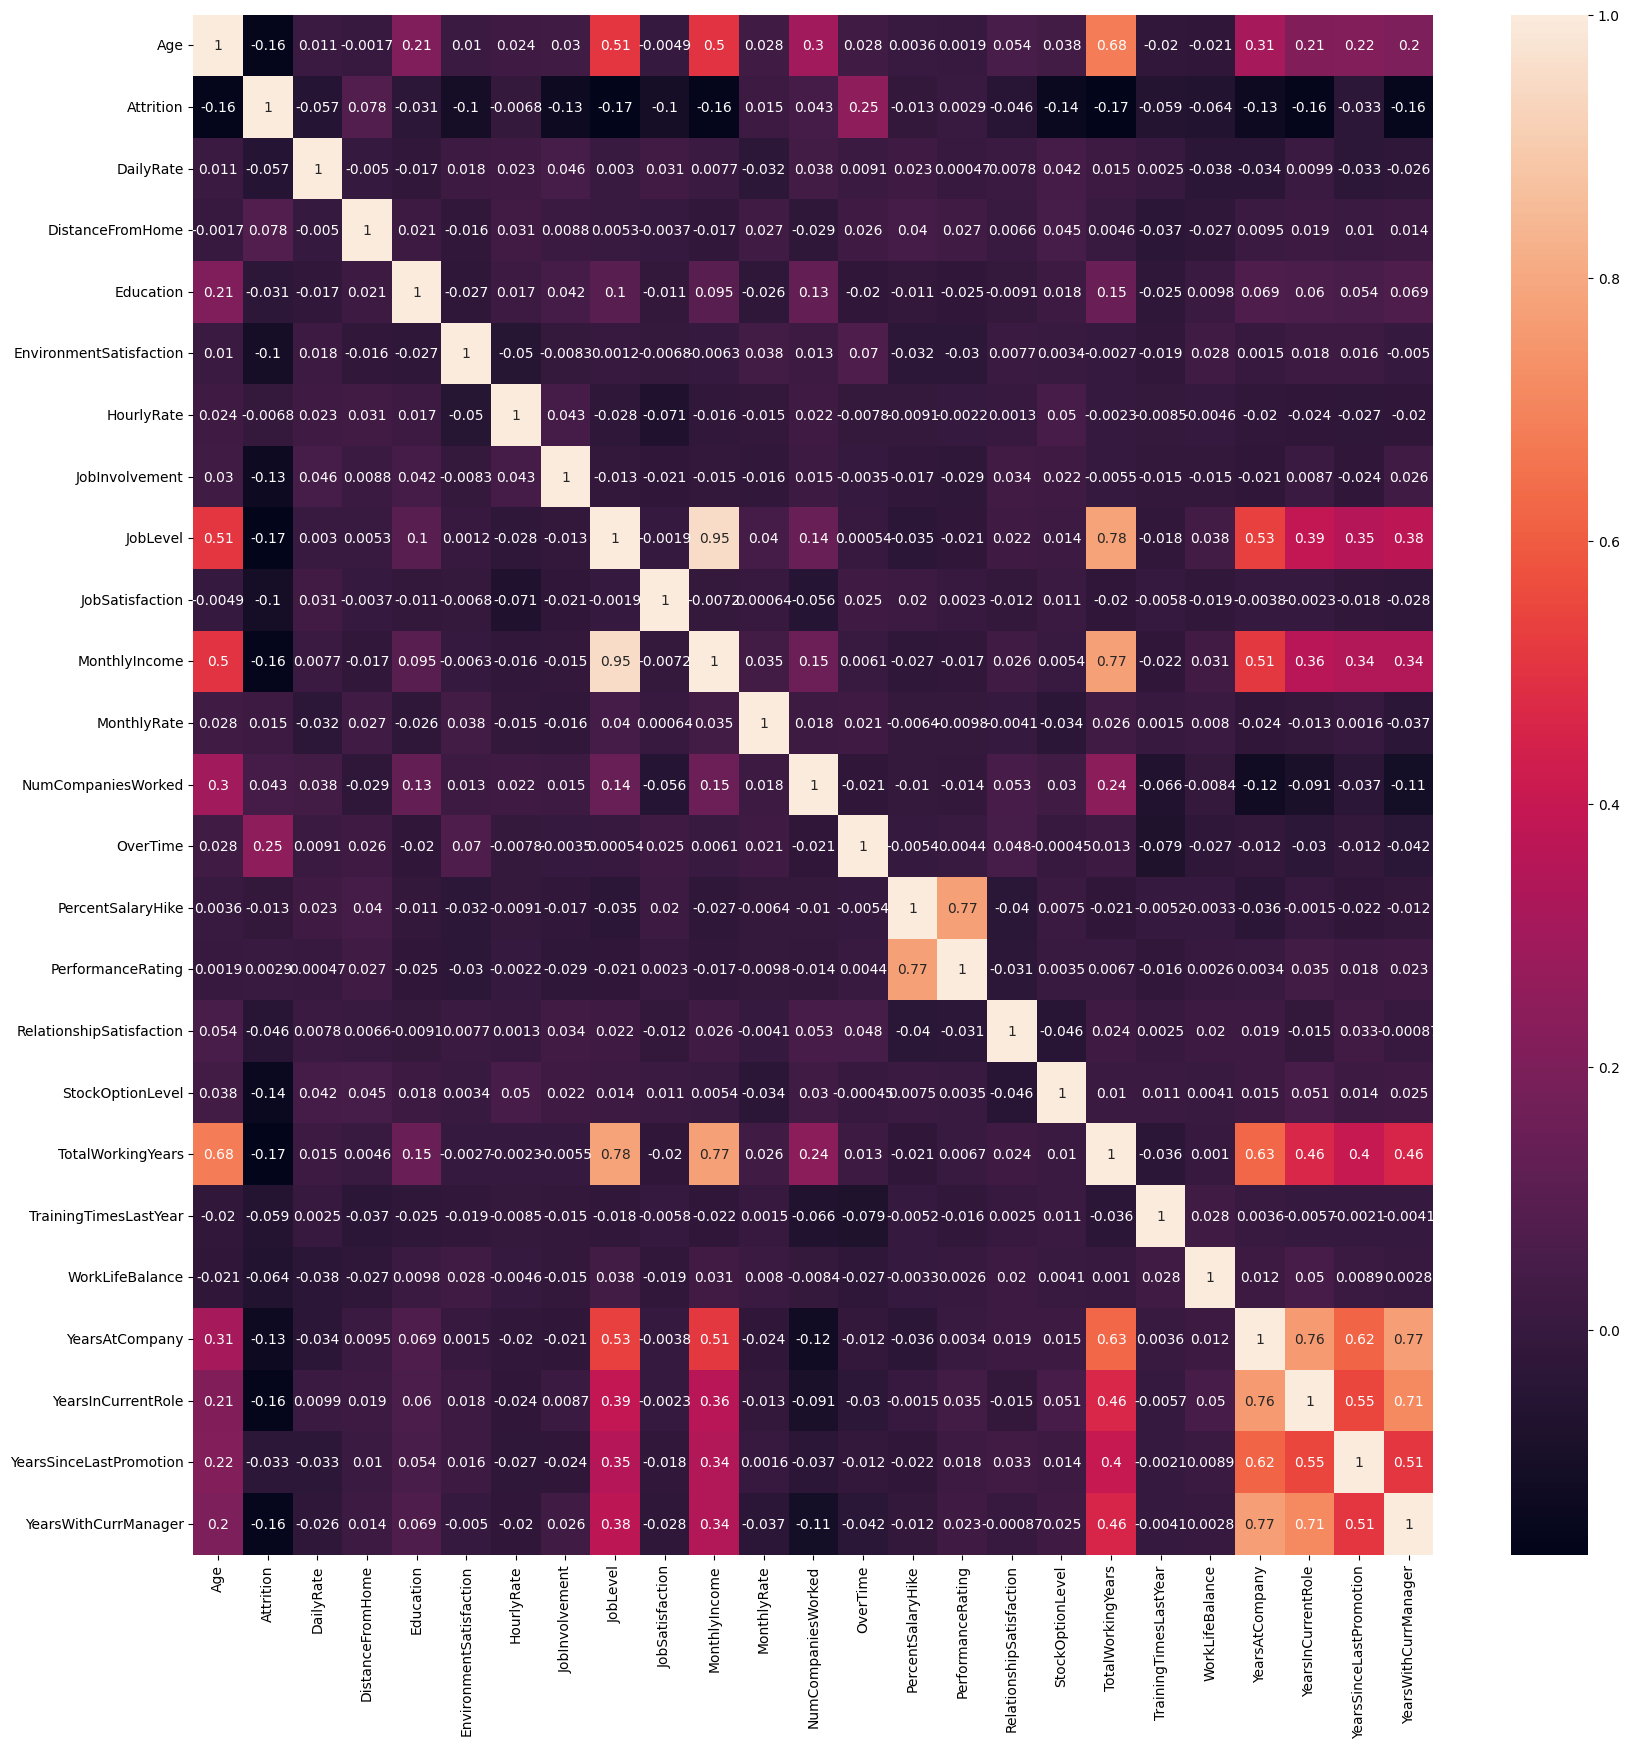

In [47]:
correlations = employee_df.corr()
x, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True)
# Job level está altamente correlacionado con el número total de horas de trabajo
# Monthly income está altamente correlacionado con Job level
# Monthly income está altamente correlacionado con el número total de horas de trabajo
# Age está altamente correlacionado con los ingresos mensuales

<Axes: xlabel='Age', ylabel='count'>

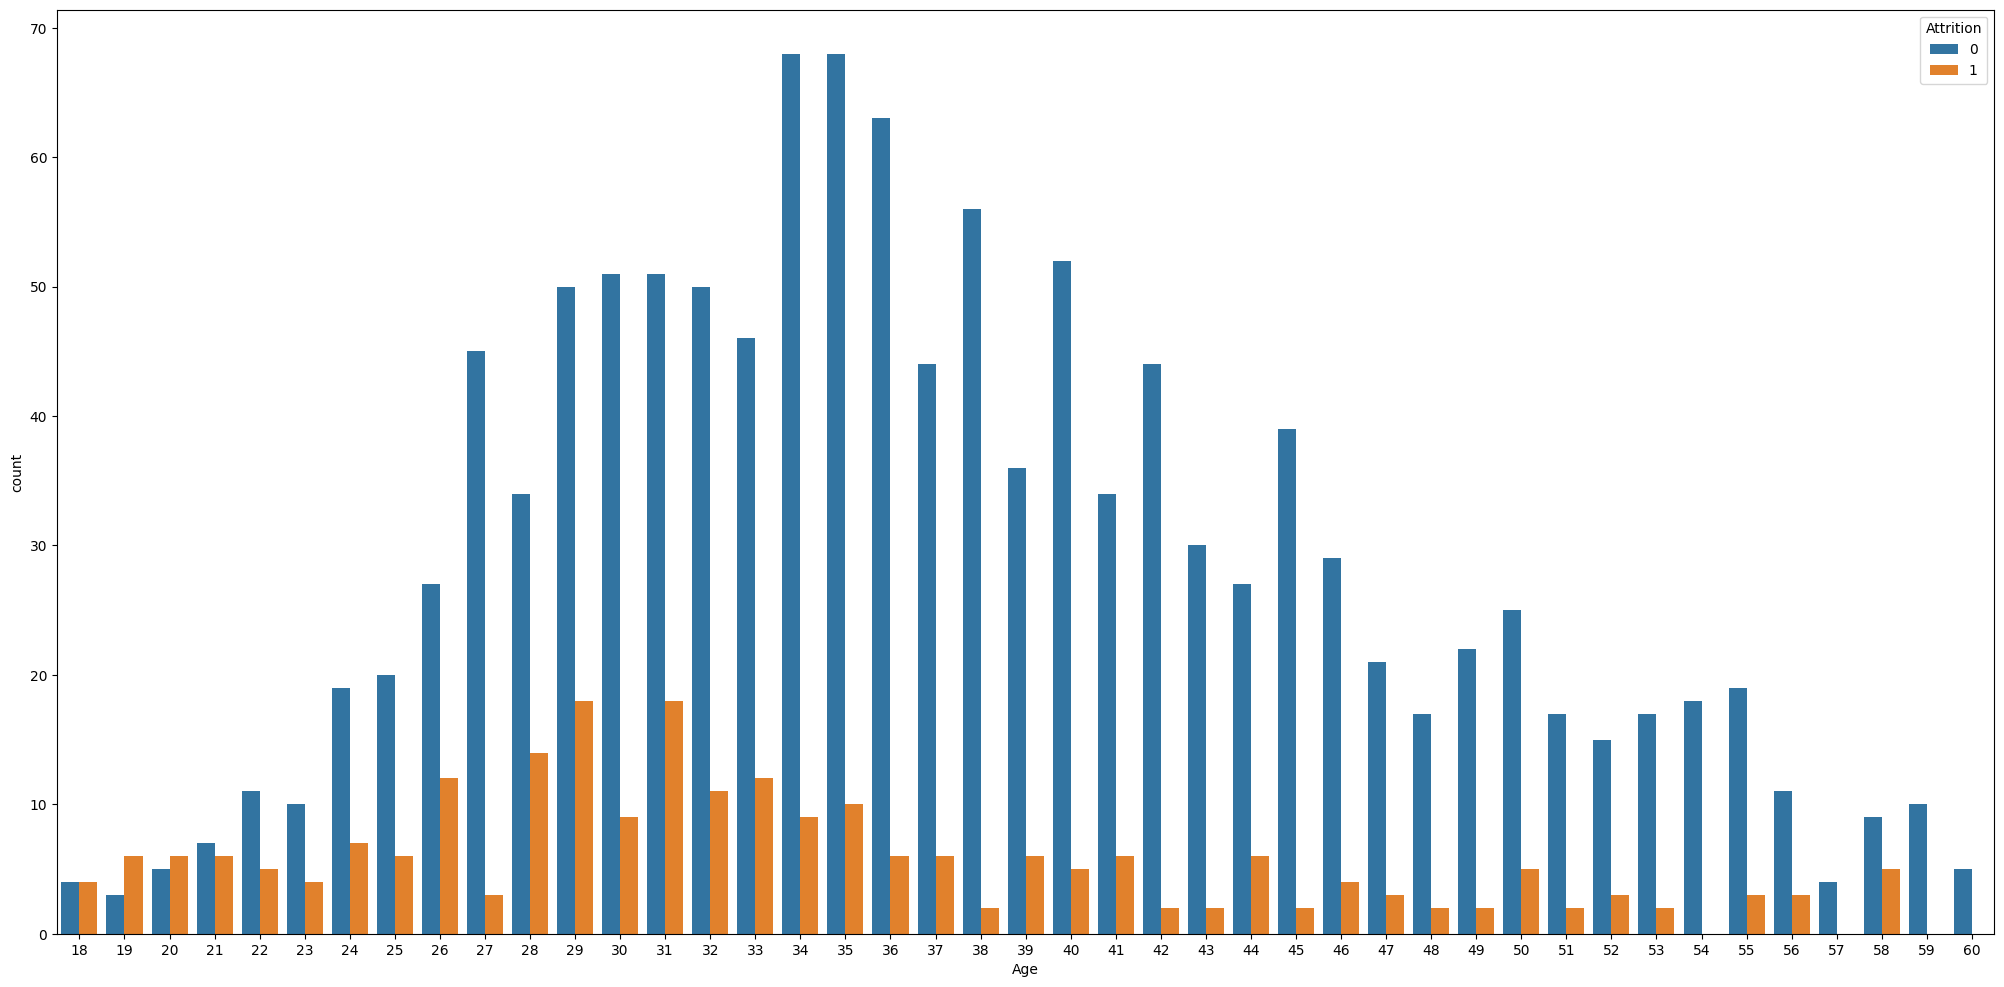

In [48]:
#comparar las distribuciones, representar las variables que consideramos que pueden marcar una tendencia para abandonar el trabajo
plt.figure(figsize=[25,12])
sns.countplot(x='Age',hue='Attrition',data=employee_df)

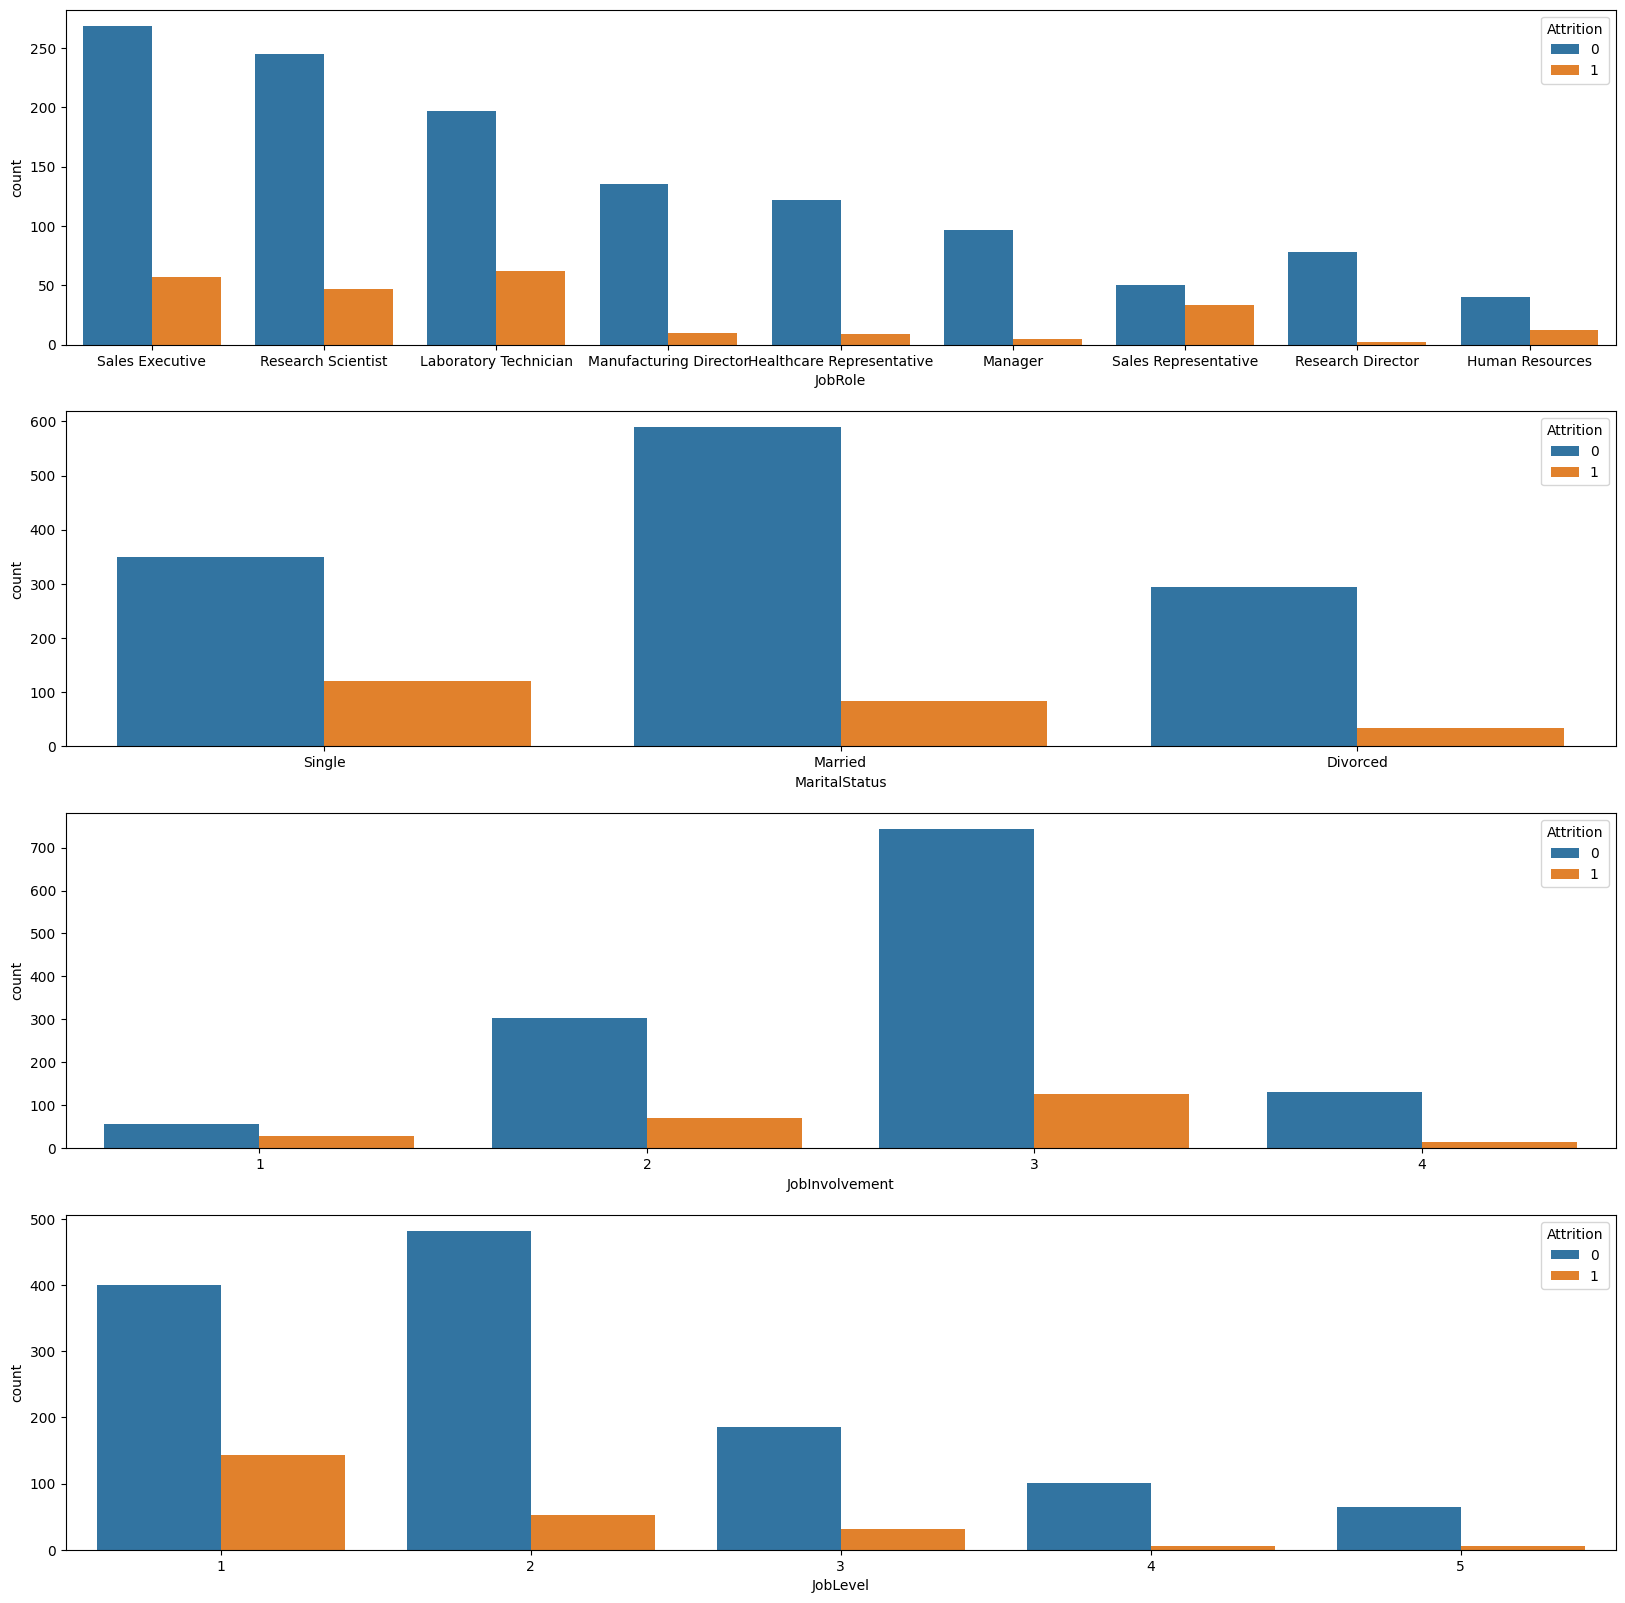

In [49]:
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x='JobRole',hue='Attrition',data=employee_df)
plt.subplot(412)
sns.countplot(x='MaritalStatus',hue='Attrition',data=employee_df)
plt.subplot(413)
sns.countplot(x='JobInvolvement',hue='Attrition',data=employee_df)
plt.subplot(414)
sns.countplot(x='JobLevel',hue='Attrition',data=employee_df)
plt.show()

# Los empleados solteros tienden a irse en comparación con los casados ​​y divorciados
# Los representantes de ventas tienden a irse en comparación con cualquier otro departamento
# Los empleados menos involucrados tienden a dejar la empresa
# Los menos experimentados (nivel laboral bajo) tienden a dejar la empresa

Text(0.5, 0, 'Distancia desde Casa al Trabajo')

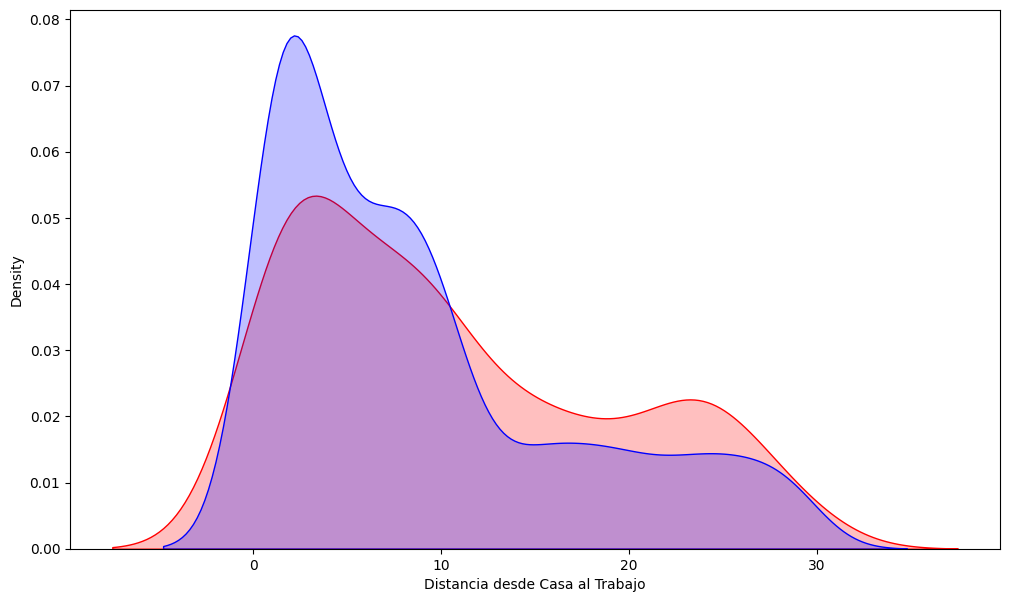

In [50]:
#Graficos de kernel kdeplot--> visualizar densidades de probabilidad en variables ******continuas*****
plt.figure(figsize=[12,7])

sns.kdeplot(left_df['DistanceFromHome'],label='EmpleadosMarchan', shade=True,color='r')
sns.kdeplot(stayed_df['DistanceFromHome'],label='EmpleadosCamisaBienPuesta', shade=True,color='b')

plt.xlabel('Distancia desde Casa al Trabajo')


# densidad de la probabilidad estimada, que tan probable es que un usuario pertenezca entre 0-10 km y ver si se queda o marcha

Text(0.5, 0, 'Años con su Manager Actual')

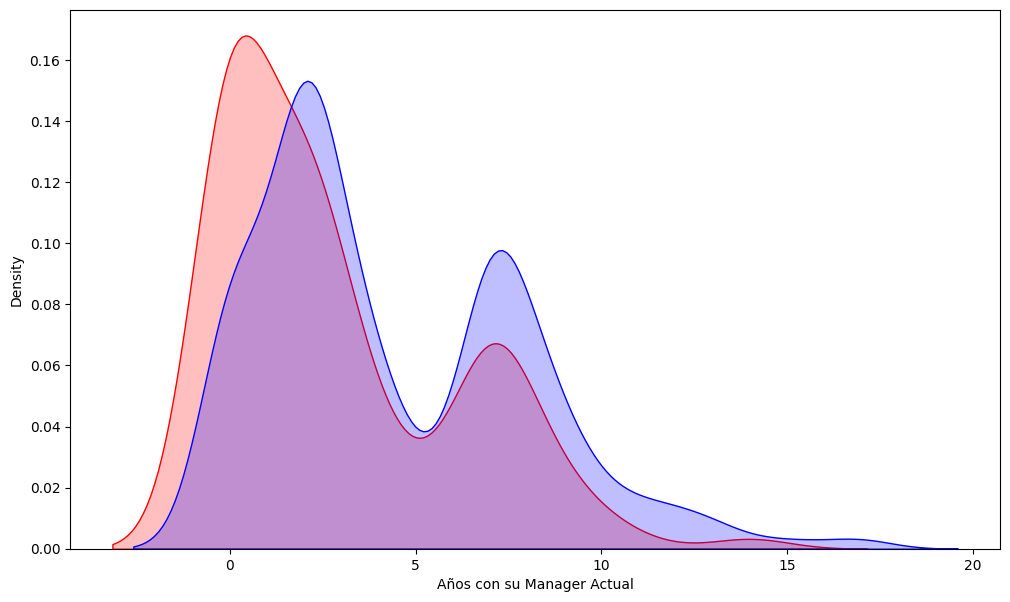

In [51]:
plt.figure(figsize=[12,7])

sns.kdeplot(left_df['YearsWithCurrManager'],label='EmpleadosMarchan', shade=True,color='r')
sns.kdeplot(stayed_df['YearsWithCurrManager'],label='EmpleadosCamisaBienPuesta', shade=True,color='b')

plt.xlabel('Años con su Manager Actual')

Text(0.5, 0, 'Número total de año de trabajo')

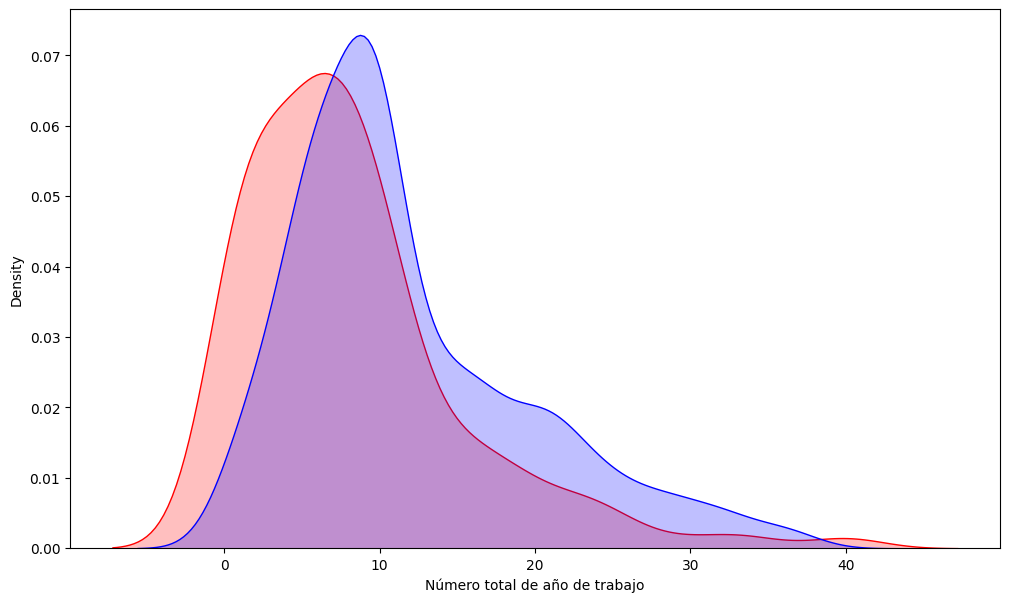

In [52]:
plt.figure(figsize=[12,7])

sns.kdeplot(left_df['TotalWorkingYears'],label='EmpleadosMarchan', shade=True,color='r')
sns.kdeplot(stayed_df['TotalWorkingYears'],label='EmpleadosCamisaBienPuesta', shade=True,color='b')

plt.xlabel('Número total de año de trabajo')

<Axes: xlabel='MonthlyIncome', ylabel='Gender'>

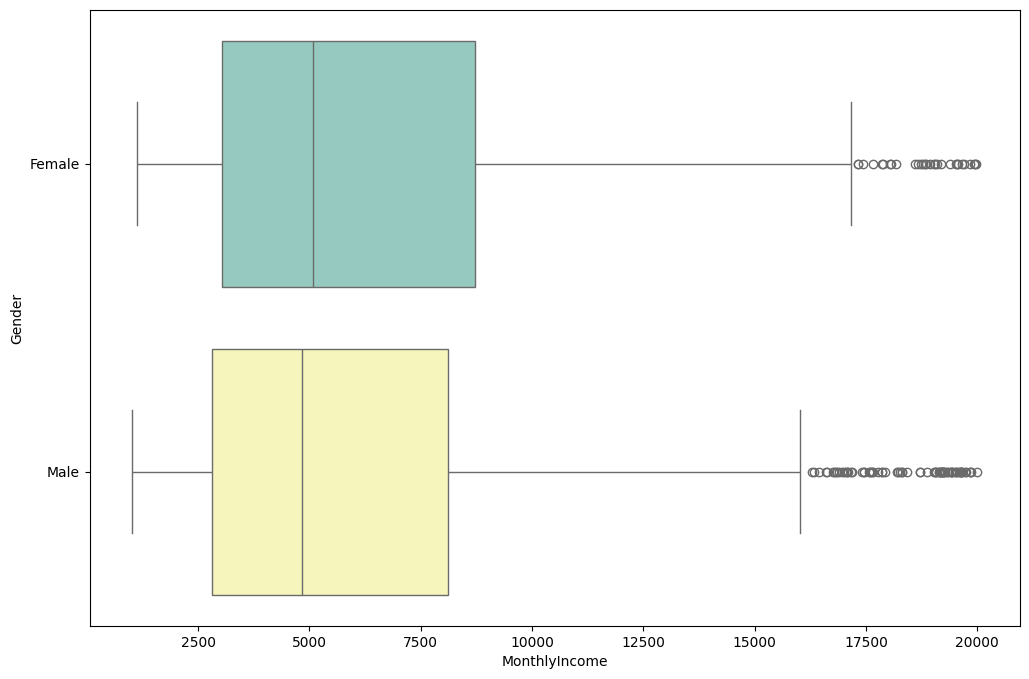

In [56]:
# boxplot ---> estudiar los ingresos mensuales de H vs M
# Gender vs. Monthly Income
plt.figure(figsize=(12,8))
sns.boxplot(x='MonthlyIncome',y='Gender',data=employee_df,palette='Set3')

<Axes: xlabel='MonthlyIncome', ylabel='JobRole'>

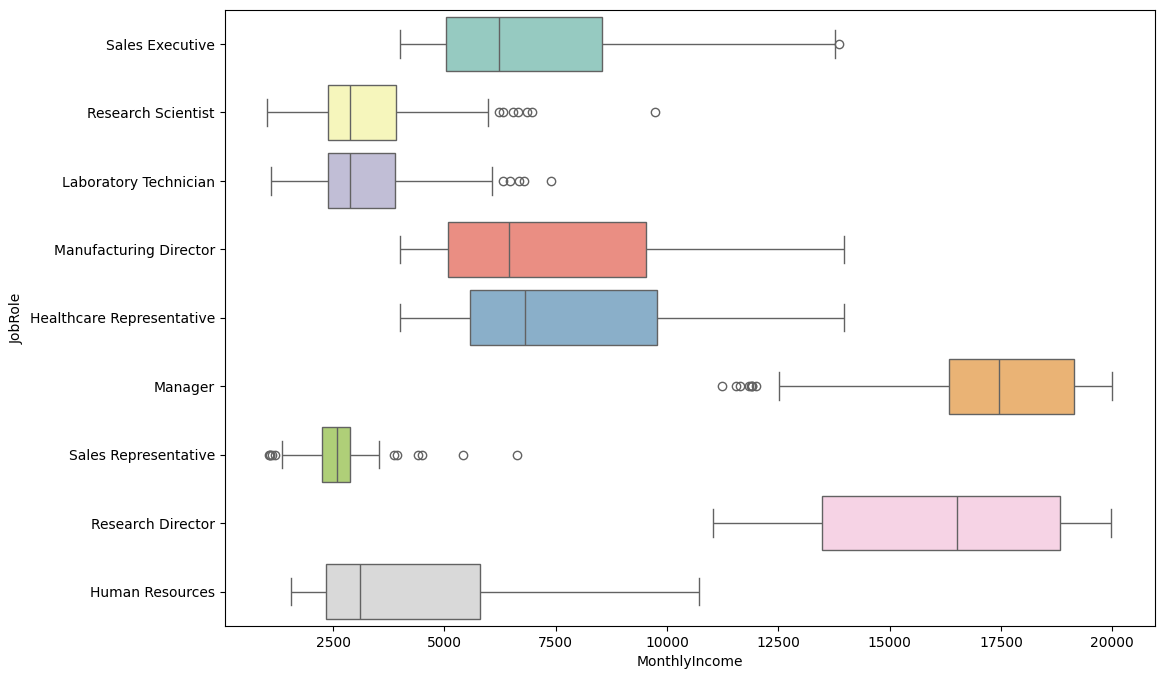

In [57]:
# Veamos el monthly income vs. job role
#variable categorica
plt.figure(figsize=(12,8))
sns.boxplot(x='MonthlyIncome',y='JobRole',data=employee_df,palette='Set3')

# Data set de entrenamiento y test

In [55]:
employee_df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0


# Limpieza de Variables

## Datos categoricos

In [26]:
#obtener las variables cotegoricas
employee_df.describe(include = ['O']).columns.tolist()

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus']

In [27]:
X_cat = employee_df.select_dtypes(include=['object'])#.drop(["Attrition","Over18","OverTime"],axis=1)
X_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [28]:
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder(drop='first')
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [29]:
X_cat.shape

(1470, 20)

In [30]:
X_cat = pd.DataFrame(X_cat)
X_cat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [55]:
# Eliminar la columna target, 'Atrittion'
X_numerical = employee_df.select_dtypes(include=['int64', 'float64']).drop(["Attrition"],axis=1)
X_numerical

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


In [ ]:
X_all = pd.concat([X_cat,X_numerical], axis=1) # concat 1 es fila
X_all

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,4,4,1,10,3,3,10,7,1,7
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,3,2,0,7,3,3,0,0,0,0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,3,0,8,3,3,8,7,3,0
4,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,3,3,1,17,3,3,5,2,0,3
1466,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,3,1,1,9,5,3,7,7,1,7
1467,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,4,2,1,6,0,3,6,2,0,3
1468,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,3,4,0,17,3,2,9,6,0,8


In [ ]:
X_all.columns = X_all.columns.astype(str)
X_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   0                         1470 non-null   float64
 1   1                         1470 non-null   float64
 2   2                         1470 non-null   float64
 3   3                         1470 non-null   float64
 4   4                         1470 non-null   float64
 5   5                         1470 non-null   float64
 6   6                         1470 non-null   float64
 7   7                         1470 non-null   float64
 8   8                         1470 non-null   float64
 9   9                         1470 non-null   float64
 10  10                        1470 non-null   float64
 11  11                        1470 non-null   float64
 12  12                        1470 non-null   float64
 13  13                        1470 non-null   float64
 14  14      

In [ ]:
# Escalar datos
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X= scaler.fit_transform(X_all)
X

array([[0.        , 1.        , 0.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [1.        , 0.        , 1.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 1.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [1.        , 0.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 1.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

In [ ]:
y = employee_df['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

# Regresión Logística

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

In [ ]:
X_train.shape

(1102, 44)

In [ ]:
X_test.shape

(368, 44)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(f"Accurracy {100*accuracy_score(y_test,y_pred)} % ")

Accurracy 86.95652173913044 % 


## Matriz de confusión

<Axes: >

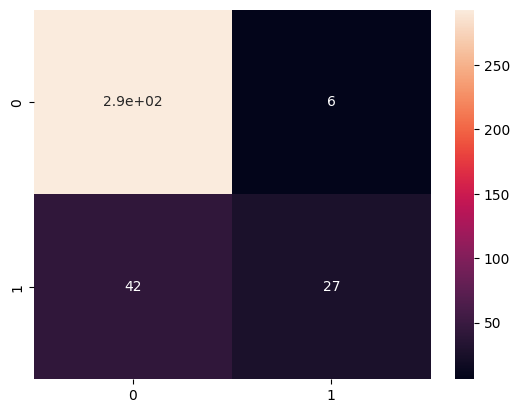

In [ ]:
# Resultados en el Conjunto de Testing
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       299
           1       0.82      0.39      0.53        69

    accuracy                           0.87       368
   macro avg       0.85      0.69      0.73       368
weighted avg       0.86      0.87      0.85       368



# Bosques Aleatorios

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)

## Matriz de confusión

<Axes: >

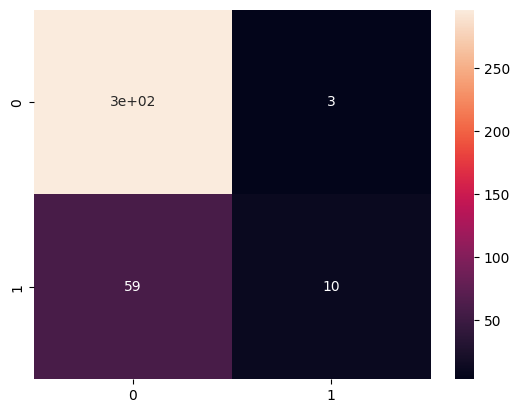

In [ ]:
# Resultados en el Conjunto de Testing
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.99      0.91       299
           1       0.77      0.14      0.24        69

    accuracy                           0.83       368
   macro avg       0.80      0.57      0.57       368
weighted avg       0.82      0.83      0.78       368



# Red Neuronal

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 500, activation='relu', input_shape=(44, )))
model.add(tf.keras.layers.Dense(units = 500, activation='relu'))
model.add(tf.keras.layers.Dense(units = 500, activation='relu'))
model.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 500)               22500     
                                                                 
 dense_9 (Dense)             (None, 500)               250500    
                                                                 
 dense_10 (Dense)            (None, 500)               250500    
                                                                 
 dense_11 (Dense)            (None, 1)                 501       
                                                                 
Total params: 524,001
Trainable params: 524,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
# oversampler = SMOTE(random_state=0)
# smote_train, smote_target = oversampler.fit_sample(X_train, y_train)
# epochs_hist = model.fit(smote_train, smote_target, epochs = 100, batch_size = 50)
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size=44)

In [ ]:
y_pred = model.predict(X_test)
y_pred

In [ ]:
y_pred = (y_pred > 0.5)
y_pred

In [ ]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

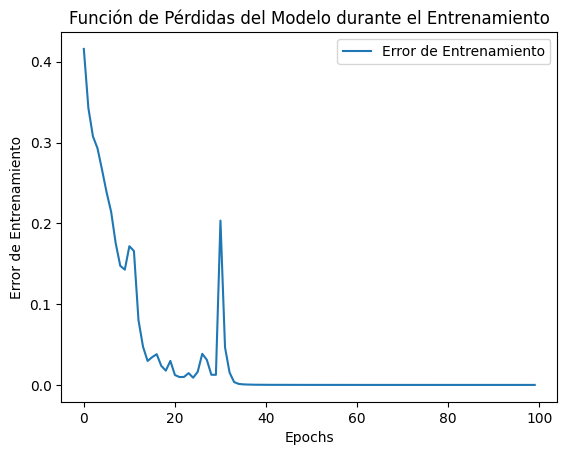

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.title("Función de Pérdidas del Modelo durante el Entrenamiento")
plt.xlabel("Epochs")
plt.ylabel("Error de Entrenamiento")
plt.legend(["Error de Entrenamiento"])

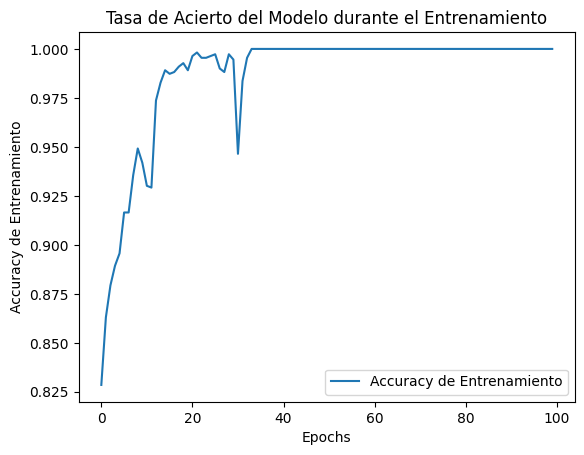

In [ ]:
plt.plot(epochs_hist.history['accuracy'])
plt.title("Tasa de Acierto del Modelo durante el Entrenamiento")
plt.xlabel("Epochs")
plt.ylabel("Accuracy de Entrenamiento")
plt.legend(["Accuracy de Entrenamiento"])

## Matriz de confusión

<Axes: >

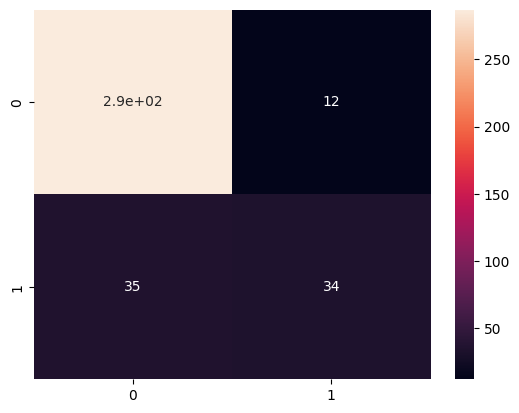

In [ ]:
# Resultados en el Conjunto de Testing
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       299
           1       0.74      0.49      0.59        69

    accuracy                           0.87       368
   macro avg       0.82      0.73      0.76       368
weighted avg       0.86      0.87      0.86       368

